In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv('./ManualPreprocessedAmesHousingClassification.csv')
dataset = dataset[['Gr Liv Area', '1st Flr SF', 'Garage Area', 'Overall Qual', 'Total Bsmt SF','SalePrice']]

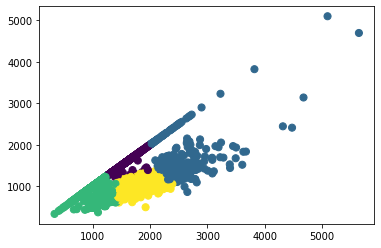

In [3]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(dataset[['Gr Liv Area', '1st Flr SF']], dataset['SalePrice'])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
ax, fig = plt.subplots()
plt.scatter(dataset['Gr Liv Area'], dataset['1st Flr SF'], c=labels, s=50, cmap='viridis')
plt.show()


In [4]:
train_data, test_data = train_test_split(dataset, test_size=0.33, random_state=42)
kmeans = KMeans(n_clusters=4)
kmeans.fit(train_data[['1st Flr SF', 'Gr Liv Area']],train_data['SalePrice'])
y_pred = kmeans.predict(test_data[['1st Flr SF', 'Gr Liv Area']])
print("Mean Squared Error: ", mean_squared_error(y_pred, test_data['SalePrice']))
print("Arrucary: ", accuracy_score(y_pred, test_data['SalePrice']))

Mean Squared Error:  2.8521199586349533
Arrucary:  0.20682523267838676


In [7]:
# 10 Fold Cross Validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(dataset)

avg_mse = 0
avg_acc = 0
for train, test in kf.split(dataset):
    train_data = dataset.iloc[train]
    test_data = dataset.iloc[test]
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(train_data.drop("SalePrice", axis=1),train_data['SalePrice'])
    y_pred = kmeans.predict(test_data.drop("SalePrice", axis=1))
    # print("Mean Squared Error: ", mean_squared_error(y_pred, test_data['SalePrice']))
    # print("Arrucary: ", accuracy_score(y_pred, test_data['SalePrice']))
    avg_mse += mean_squared_error(y_pred, test_data['SalePrice'])
    avg_acc += accuracy_score(y_pred, test_data['SalePrice'])
print("Average Mean Squared Error: ", avg_mse/10)
print("Average Arrucary: ", avg_acc/10)

Average Mean Squared Error:  1.9180887372013653
Average Arrucary:  0.31058020477815695


In [32]:
dataset = pd.read_csv('./ManualPreprocessedAmesHousingClassification.csv')
# Manually Selected Features
dataset = dataset[['1st Flr SF', '2nd Flr SF', 'BsmtFin SF 1', 'Enclosed Porch', 'Garage Area', 'Gr Liv Area', 'Mas Vnr Area', 'Overall Qual', 'SalePrice']]

# PCA on dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(dataset.drop('SalePrice', axis=1))
x_data = pca.transform(dataset.drop('SalePrice', axis=1))
x_data = pd.DataFrame(x_data)
y_data = dataset['SalePrice']
y_data = pd.DataFrame(y_data)

In [33]:
x_data.head()

,0,1
0,270.214814,514.584650
1,-633.235898,256.104239
2,-58.746668,599.282390
3,909.295755,863.874202
4,231.448390,-150.234091


In [34]:
y_data.head()

,SalePrice
0,3.0
1,0.0
2,2.0
3,3.0
4,2.0


In [35]:
kf = KFold(n_splits=10)
kf.get_n_splits(dataset)
avg_mse = 0
avg_acc = 0
for train, test in kf.split(x_data):
    x_train = x_data.iloc[train]
    x_test = x_data.iloc[test]
    y_train = y_data.iloc[train]
    y_test = y_data.iloc[test]
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(x_train,y_train)
    y_pred = kmeans.predict(x_test)
    # print("Mean Squared Error: ", mean_squared_error(y_pred, test_data['SalePrice']))
    # print("Arrucary: ", accuracy_score(y_pred, test_data['SalePrice']))
    avg_mse += mean_squared_error(y_pred, y_test)
    avg_acc += accuracy_score(y_pred, test_data['SalePrice'])
print("Average Mean Squared Error: ", avg_mse/10)
print("Average Arrucary: ", avg_acc/10)

Average Mean Squared Error:  2.4313993174061435
Average Arrucary:  0.23481228668941978
